###Holly Figueroa
###DSC650 Week 5  

**Book Exercise 3.4**

In [62]:
from keras.src.engine.sequential import Sequential
from keras.datasets import imdb
import numpy as np
from keras import layers
from keras.models import Sequential

In [63]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [64]:
# Encode the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [65]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [66]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [67]:
# define model
model=Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
# Compile
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [69]:
# Vaidate - create validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [70]:
# Model training
model.compile(optimizer =  'rmsprop',
              loss = 'binary_crossentropy',
              metrics =['acc'])


In [71]:
epochs = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 101ms/step - loss: 0.5465 - acc: 0.7709 - val_loss: 0.4164 - val_acc: 0.8567
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.3351 - acc: 0.8925 - val_loss: 0.3191 - val_acc: 0.8824
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2507 - acc: 0.9176 - val_loss: 0.2918 - val_acc: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1999 - acc: 0.9341 - val_loss: 0.2808 - val_acc: 0.8856
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1690 - acc: 0.9455 - val_loss: 0.2875 - val_acc: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1421 - acc: 0.9549 - val_loss: 0.2825 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1238 - acc: 0.9614 - val_loss: 0.2944 - val_acc: 0.8857
Epoch 8/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1057 - 

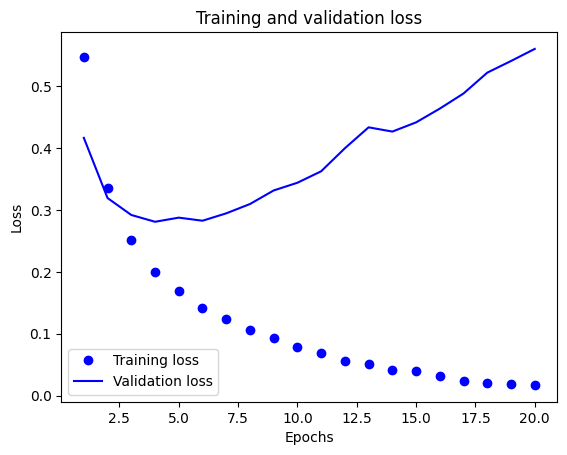

In [72]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Create axis range based on epochs
x_axis = [i for i in range(1, epochs+1)]

plt.plot(x_axis, loss_values,'bo', label='Training loss')
plt.plot(x_axis, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


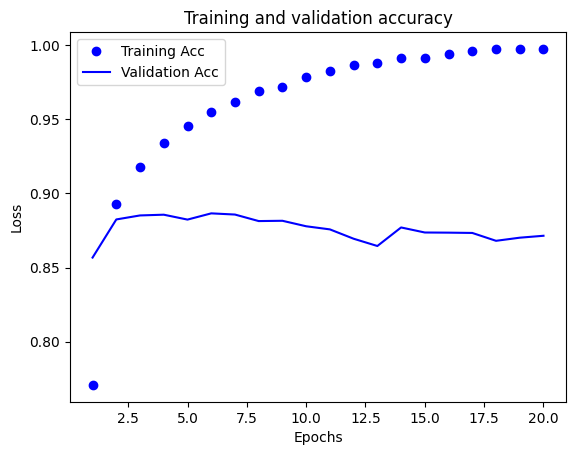

In [73]:
# Plot training and validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(x_axis, acc_values,'bo', label='Training Acc')
plt.plot(x_axis, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()